# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [123]:
# bibliotecas

from pandas_datareader import data as web
import yfinance as yf
import plotly.express as px
from plotly import graph_objects

import pandas as pd
import numpy as np

In [124]:
%%time
ativos = '^BVSP'
dt_ini = '2022-06-03'

dados = yf.download(ativos, start=dt_ini)
print(dados)

[*********************100%%**********************]  1 of 1 completed

                     Open           High            Low          Close  \
Date                                                                     
2022-06-03  112392.000000  112392.000000  110935.000000  111102.000000   
2022-06-06  111102.000000  111935.000000  110015.000000  110186.000000   
2022-06-07  110185.000000  110435.000000  109394.000000  110070.000000   
2022-06-08  110067.000000  110142.000000  108045.000000  108368.000000   
2022-06-09  108367.000000  108510.000000  107068.000000  107094.000000   
...                   ...            ...            ...            ...   
2024-05-27  124297.000000  124535.000000  124081.000000  124496.000000   
2024-05-28  124498.000000  125392.000000  123537.000000  123780.000000   
2024-05-29  123780.000000  123780.000000  122458.000000  122707.000000   
2024-05-31  122704.000000  122837.000000  121929.000000  122098.000000   
2024-06-03  122099.953125  122477.328125  121495.632812  122202.453125   

                Adj Close    Volume  

In [126]:
%%time
ativos = ['^BVSP', 'ITUB3.SA', 'PETR4.SA']
dt_ini = '2022-06-03'

# Baixa os dados dos ativos
dados = yf.download(ativos, start=dt_ini)

# Exibe as primeiras linhas dos dados obtidos
print(dados.head())

[*********************100%%**********************]  3 of 3 completed

Price       Adj Close                           Close                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  19.024784  16.629686  111102.0  21.969999  30.280001  111102.0   
2022-06-06  19.024784  16.640671  110186.0  21.969999  30.299999  110186.0   
2022-06-07  19.076750  16.838381  110070.0  22.030001  30.660000  110070.0   
2022-06-08  18.730364  16.756002  108368.0  21.629999  30.510000  108368.0   
2022-06-09  18.349354  16.514357  107094.0  21.190001  30.070000  107094.0   

Price            High                             Low                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  22.129999  30.440001  112392.0  21.879999  29.530001  110935.0   
2022-06-06  22.260000  30.530001  111935.0  21.860001  29.91000

In [128]:
# Quantidade de linhas e colunas dos últimos 2 anos

dados.shape

(498, 18)

In [129]:
# Salvando o DataFrame em um arquivo CSV

dados.to_csv('dados.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [130]:
# verificando os nulos - low

num_nulos = dados['Low'].isna().sum()
print(num_nulos)

Ticker
ITUB3.SA    0
PETR4.SA    0
^BVSP       0
dtype: int64


In [131]:
# verificando os nulos - High

num_nulos = dados['High'].isna().sum()
print(num_nulos)

Ticker
ITUB3.SA    0
PETR4.SA    0
^BVSP       0
dtype: int64


In [132]:
# nome das colunas

dados.columns

MultiIndex([('Adj Close', 'ITUB3.SA'),
            ('Adj Close', 'PETR4.SA'),
            ('Adj Close',    '^BVSP'),
            (    'Close', 'ITUB3.SA'),
            (    'Close', 'PETR4.SA'),
            (    'Close',    '^BVSP'),
            (     'High', 'ITUB3.SA'),
            (     'High', 'PETR4.SA'),
            (     'High',    '^BVSP'),
            (      'Low', 'ITUB3.SA'),
            (      'Low', 'PETR4.SA'),
            (      'Low',    '^BVSP'),
            (     'Open', 'ITUB3.SA'),
            (     'Open', 'PETR4.SA'),
            (     'Open',    '^BVSP'),
            (   'Volume', 'ITUB3.SA'),
            (   'Volume', 'PETR4.SA'),
            (   'Volume',    '^BVSP')],
           names=['Price', 'Ticker'])

In [133]:
# verificando os dados

dados.head()

Price       Adj Close                           Close                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  19.024784  16.629686  111102.0  21.969999  30.280001  111102.0   
2022-06-06  19.024784  16.640671  110186.0  21.969999  30.299999  110186.0   
2022-06-07  19.076750  16.838381  110070.0  22.030001  30.660000  110070.0   
2022-06-08  18.730364  16.756002  108368.0  21.629999  30.510000  108368.0   
2022-06-09  18.349354  16.514357  107094.0  21.190001  30.070000  107094.0   

Price            High                             Low                       \
Ticker       ITUB3.SA   PETR4.SA     ^BVSP   ITUB3.SA   PETR4.SA     ^BVSP   
Date                                                                         
2022-06-03  22.129999  30.440001  112392.0  21.879999  29.530001  110935.0   
2022-06-06  22.260000  30.530001  111935.0  21.860001  29.910000  110015.0   
2022-06-07  22.030001  31.299999  110435.0  21.750000  30.160000  109394.0   
2022-06-08  21.959999  31.150000  110142.0  21.490000  30.330000  108045.0   
2022-06-09  21.600000  30.660000  108510.0  21.080000  29.980000  107068.0   

Price            Open                        Volume                      
Ticker       ITUB3.SA   PETR4.SA     ^BVSP ITUB3.SA  PETR4.SA     ^BVSP  
Date                                                                     
2022-06-03  22.000000  29.709999  112392.0   699800  60396900   8757500  
2022-06-06  22.040001  30.500000  111102.0   343600  39213900   8212400  
2022-06-07  21.889999  30.190001  110185.0   363600  80333700   9466200  
2022-06-08  21.780001  30.420000  110067.0   676100  65923900  10379900  
2022-06-09  21.600000  30.510000  108367.0   246300  53879000  11955500

In [134]:
# Verificar os tipos de dados em cada coluna do DataFrame

tipos_dados = dados.dtypes
print(tipos_dados)

Price      Ticker  
Adj Close  ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Close      ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
High       ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Low        ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Open       ITUB3.SA    float64
           PETR4.SA    float64
           ^BVSP       float64
Volume     ITUB3.SA      int64
           PETR4.SA      int64
           ^BVSP         int64
dtype: object


In [135]:
# Criando um DataFrame a partir dos dados com MultiIndex nas colunas

columns = pd.MultiIndex.from_tuples(dados.keys(), names=['Price', 'Ticker'])
index = pd.date_range(start='2022-06-01', periods=5, freq='D')
df = pd.DataFrame(dados, index=index)

# Calculando a amplitude (High - Low) para cada ticker
high = df.xs('High', level='Price', axis=1)
low = df.xs('Low', level='Price', axis=1)
amplitude = high - low

# Adicionando a nova coluna de amplitude ao DataFrame original
amplitude.columns = pd.MultiIndex.from_product([['Amplitude'], amplitude.columns])
df = pd.concat([dados, amplitude], axis=1)

print(df)

            Adj Close                                Close             \
Ticker       ITUB3.SA   PETR4.SA          ^BVSP   ITUB3.SA   PETR4.SA   
2022-06-01        NaN        NaN            NaN        NaN        NaN   
2022-06-02        NaN        NaN            NaN        NaN        NaN   
2022-06-03  19.024784  16.629686  111102.000000  21.969999  30.280001   
2022-06-04        NaN        NaN            NaN        NaN        NaN   
2022-06-05        NaN        NaN            NaN        NaN        NaN   
...               ...        ...            ...        ...        ...   
2024-05-27  27.402042  37.009998  124496.000000  27.420000  37.009998   
2024-05-28  27.332088  37.799999  123780.000000  27.350000  37.799999   
2024-05-29  27.192179  37.750000  122707.000000  27.209999  37.750000   
2024-05-31  26.932350  38.790001  122098.000000  26.950001  38.790001   
2024-06-03  27.120001  38.730000  122202.453125  27.120001  38.730000   

                                High              

In [136]:

fechamento_vertical = df['Adj Close'].stack().reset_index()
fechamento_vertical.columns = ['data', 'ativo', 'amplitude']

fechamento_vertical.head()

,data,ativo,amplitude
0,2022-06-03,ITUB3.SA,19.024784
1,2022-06-03,PETR4.SA,16.629686
2,2022-06-03,^BVSP,111102.000000
3,2022-06-06,ITUB3.SA,19.024784
4,2022-06-06,PETR4.SA,16.640671


C:\Users\Cristina\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



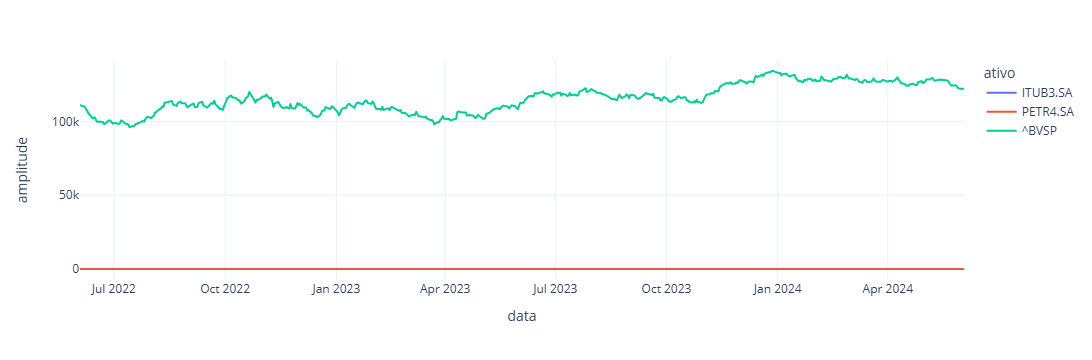

In [137]:

fig = px.line(fechamento_vertical, x="data", y="amplitude", color='ativo', template='plotly_white')
fig.show()

In [138]:
# Veja se consegue identificar que ativo apresentou maior volatilidade.
# A maior volatividade aconteceu no dia: 

# Ordenar o DataFrame pela coluna 'amplitude' em ordem decrescente
fechamento_vertical = fechamento_vertical.sort_values(by='amplitude', ascending=False)

# Exibir as primeiras linhas do DataFrame resultante
fechamento_vertical.head(1)

,data,ativo,amplitude
1175,2023-12-27,^BVSP,134194.0
